In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr
from pylab import rcParams
rcParams['figure.figsize']=10,15

# Converting Coloured Pic To GrayScaled Format...

In [2]:
img=cv2.imread('white_audi.jpg')

In [3]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [4]:
#Converting colour to gray(RGB--->>>BGR To Gray)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

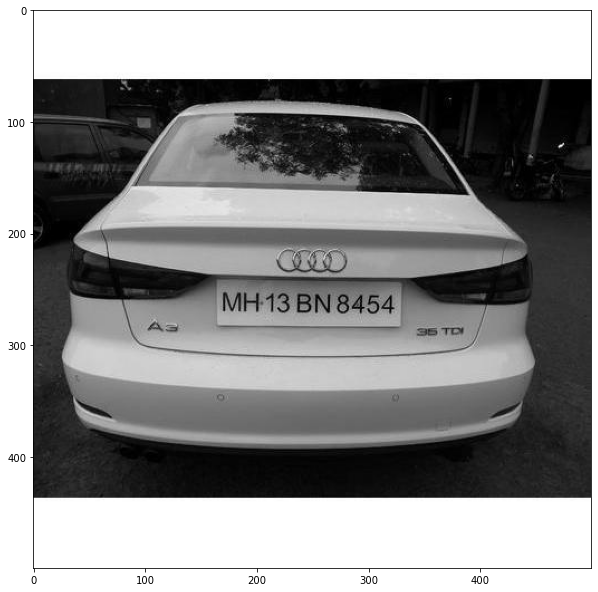

In [6]:
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

# Now Applying Filter and Edge Detection

In [7]:
#reducing Noise
bfilter=cv2.bilateralFilter(gray,11,17,17)

In [8]:
#Edge Detection
edge=cv2.Canny(bfilter,30,200)

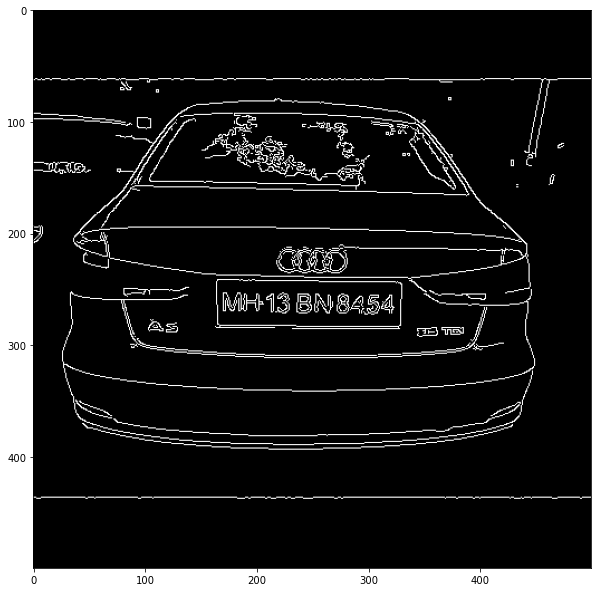

In [9]:
plt.imshow(cv2.cvtColor(edge,cv2.COLOR_BGR2RGB))

# Lets Find Contour and Apply MAP

In [10]:
#Find Contour
keypoint=cv2.findContours(edge.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [11]:
keypoint

((array([[[  0, 436]],
  
         [[  2, 436]],
  
         [[  3, 437]],
  
         [[  6, 437]],
  
         [[  7, 436]],
  
         [[ 46, 436]],
  
         [[ 47, 437]],
  
         [[ 48, 437]],
  
         [[ 49, 436]],
  
         [[ 54, 436]],
  
         [[ 55, 437]],
  
         [[ 56, 436]],
  
         [[ 93, 436]],
  
         [[ 94, 437]],
  
         [[ 96, 437]],
  
         [[ 97, 436]],
  
         [[106, 436]],
  
         [[107, 437]],
  
         [[108, 436]],
  
         [[182, 436]],
  
         [[183, 437]],
  
         [[189, 437]],
  
         [[190, 436]],
  
         [[192, 436]],
  
         [[193, 437]],
  
         [[194, 437]],
  
         [[195, 436]],
  
         [[207, 436]],
  
         [[208, 437]],
  
         [[209, 437]],
  
         [[210, 436]],
  
         [[212, 436]],
  
         [[213, 437]],
  
         [[217, 437]],
  
         [[218, 436]],
  
         [[225, 436]],
  
         [[226, 437]],
  
         [[227, 437]],
  
         [[2

In [12]:
contour=imutils.grab_contours(keypoint)

In [13]:
contour

(array([[[  0, 436]],
 
        [[  2, 436]],
 
        [[  3, 437]],
 
        [[  6, 437]],
 
        [[  7, 436]],
 
        [[ 46, 436]],
 
        [[ 47, 437]],
 
        [[ 48, 437]],
 
        [[ 49, 436]],
 
        [[ 54, 436]],
 
        [[ 55, 437]],
 
        [[ 56, 436]],
 
        [[ 93, 436]],
 
        [[ 94, 437]],
 
        [[ 96, 437]],
 
        [[ 97, 436]],
 
        [[106, 436]],
 
        [[107, 437]],
 
        [[108, 436]],
 
        [[182, 436]],
 
        [[183, 437]],
 
        [[189, 437]],
 
        [[190, 436]],
 
        [[192, 436]],
 
        [[193, 437]],
 
        [[194, 437]],
 
        [[195, 436]],
 
        [[207, 436]],
 
        [[208, 437]],
 
        [[209, 437]],
 
        [[210, 436]],
 
        [[212, 436]],
 
        [[213, 437]],
 
        [[217, 437]],
 
        [[218, 436]],
 
        [[225, 436]],
 
        [[226, 437]],
 
        [[227, 437]],
 
        [[228, 436]],
 
        [[230, 436]],
 
        [[231, 437]],
 
        [[234, 4

In [14]:
contour=sorted(contour,key=cv2.contourArea,reverse=True)[:10]

# lets store 4 points of number plate

In [15]:
location=None

for conti in contour:
    approx=cv2.approxPolyDP(conti,10,True)
    if len(approx)==4:
        location=approx
        break

In [16]:
location

array([[[164, 243]],

       [[164, 284]],

       [[329, 282]],

       [[326, 243]]], dtype=int32)

# Now shaping the numberplate

In [17]:
mask=np.zeros(gray.shape,np.uint8)

In [18]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# now contouring the number plate part

In [19]:
new_image=cv2.drawContours(mask,[location],0,255,-1)

In [20]:
new_image=cv2.bitwise_and(img,img,mask=mask)

In [21]:
new_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

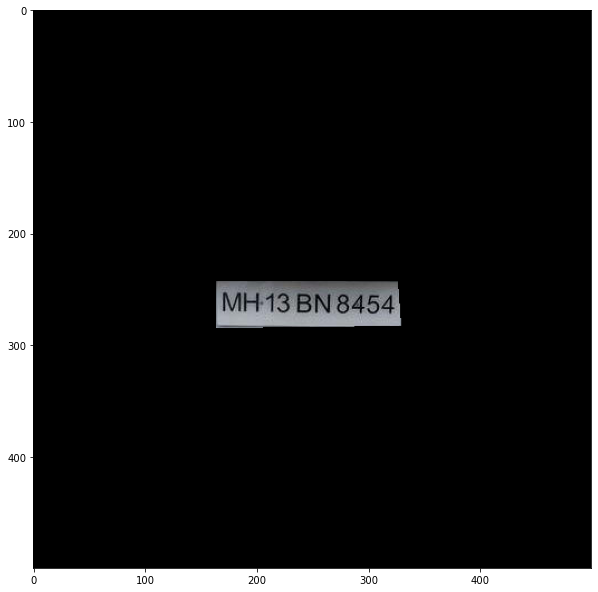

In [22]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

# Now extracting number plate

In [23]:
(x,y)=np.where(mask==255)

In [24]:
(x,y)

(array([243, 243, 243, ..., 284, 284, 284], dtype=int64),
 array([164, 165, 166, ..., 203, 204, 205], dtype=int64))

In [25]:
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))

In [26]:
(x1,y1)

(243, 164)

In [27]:
(x2,y2)

(284, 329)

In [28]:
cropped_image=gray[x1:x2+1,y1:y2+1]

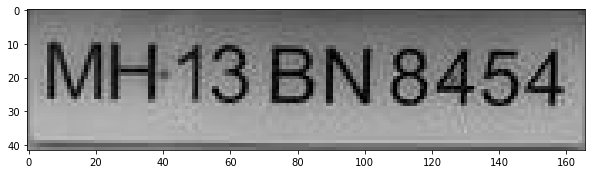

In [29]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

# Lets read the text

In [30]:
reader=easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [31]:
result=reader.readtext(cropped_image)

In [32]:
result

[([[2, 6], [162, 6], [162, 34], [2, 34]], 'MH13 BN8454', 0.9576936753640796)]

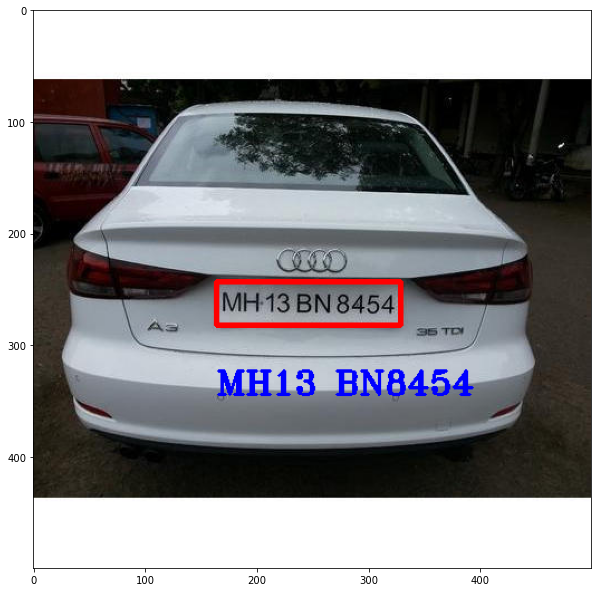

In [33]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_TRIPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(255,0,0), thickness=2, lineType=cv2.LINE_4)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,0,255),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))